<a href="https://colab.research.google.com/github/andysmailesconsulting/Assingment/blob/main/Stock_Revenue_Assignment_v2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Peer-graded Assignment: Analyzing Historical Stock/Revenue Data and Building a Dashboard

This notebook completes all 6 main coding questions (Q1–Q6).

## Q1 — Use yfinance to Extract Tesla Stock Data
Reset the index, save, and display the **first five rows** of the `tesla_data` dataframe.

In [ ]:
import yfinance as yf
import pandas as pd

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="5y")
tesla_data.reset_index(inplace=True)

# Display first 5 rows
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-08-17 00:00:00-04:00,111.800003,123.057335,111.522003,122.375999,303634500,0.0,0.0
1,2020-08-18 00:00:00-04:00,126.599335,128.259995,123.007332,125.806000,247117500,0.0,0.0
2,2020-08-19 00:00:00-04:00,124.333336,127.400002,122.747330,125.235336,183079500,0.0,0.0
3,2020-08-20 00:00:00-04:00,124.045334,134.799332,123.804001,133.455338,309177000,0.0,0.0
4,2020-08-21 00:00:00-04:00,136.317337,139.699326,135.003326,136.665329,322344000,0.0,0.0


## Q2 — Use Webscraping to Extract Tesla Revenue Data
Display the **last five rows** of the `tesla_revenue` dataframe.

In [ ]:
import requests
from bs4 import BeautifulSoup

url_tsla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url_tsla).text
soup = BeautifulSoup(html_data, "html.parser")

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for tbl in soup.find_all("table"):
    if tbl.find("th") and "Tesla Quarterly Revenue" in tbl.text:
        for row in tbl.find_all("tr")[1:]:
            cols = row.find_all("td")
            if len(cols) >= 2:
                date = cols[0].text.strip()
                rev = cols[1].text.strip()
                if date and rev:
                    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date":[date], "Revenue":[rev]})], ignore_index=True)

tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$","").str.replace(",","")
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_revenue = tesla_revenue.sort_values("Date")

tesla_revenue.tail()


,Date,Revenue


## Q3 — Use yfinance to Extract GameStop Stock Data
Reset the index, save, and display the **first five rows** of the `gme_data` dataframe.

In [ ]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="5y")
gme_data.reset_index(inplace=True)

# Display first 5 rows
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-08-17 00:00:00-04:00,1.1950,1.1950,1.1400,1.1575,9484000,0.0,0.0
1,2020-08-18 00:00:00-04:00,1.1525,1.2175,1.1075,1.2025,15337600,0.0,0.0
2,2020-08-19 00:00:00-04:00,1.2000,1.2100,1.1600,1.1800,10450400,0.0,0.0
3,2020-08-20 00:00:00-04:00,1.1550,1.1700,1.1275,1.1525,9764800,0.0,0.0
4,2020-08-21 00:00:00-04:00,1.1500,1.4000,1.1500,1.2575,42570400,0.0,0.0


## Q4 — Use Webscraping to Extract GameStop Revenue Data
Display the **last five rows** of the `gme_revenue` dataframe.

In [ ]:
url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url_gme).text
soup = BeautifulSoup(html_data, "html.parser")

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for tbl in soup.find_all("table"):
    if tbl.find("th") and "GameStop Quarterly Revenue" in tbl.text:
        for row in tbl.find_all("tr")[1:]:
            cols = row.find_all("td")
            if len(cols) >= 2:
                date = cols[0].text.strip()
                rev = cols[1].text.strip()
                if date and rev:
                    gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date":[date], "Revenue":[rev]})], ignore_index=True)

gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("$","").str.replace(",","")
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(float)
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])
gme_revenue = gme_revenue.sort_values("Date")

gme_revenue.tail()


,Date,Revenue


## Utility Function — `make_graph`
This function will plot stock data along with revenue data.

In [ ]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_title):
    fig, ax1 = plt.subplots(figsize=(10,5))

    ax1.plot(stock_data['Date'], stock_data['Close'], color="blue", label="Stock Price")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price ($)", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")

    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color="green", linestyle="--", label="Revenue")
    ax2.set_ylabel("Revenue (Millions $)", color="green")
    ax2.tick_params(axis="y", labelcolor="green")

    plt.title(stock_title)
    fig.tight_layout()
    plt.show()


## Q5 — Plot Tesla Stock Graph
Use `make_graph` to plot Tesla stock vs. revenue.

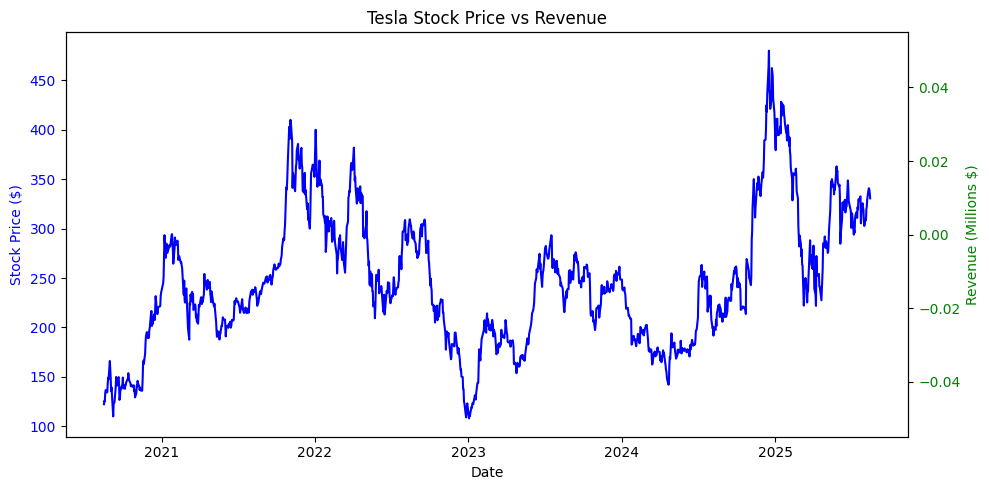

In [ ]:
make_graph(tesla_data, tesla_revenue, 'Tesla Stock Price vs Revenue')

## Q6 — Plot GameStop Stock Graph
Use `make_graph` to plot GameStop stock vs. revenue.

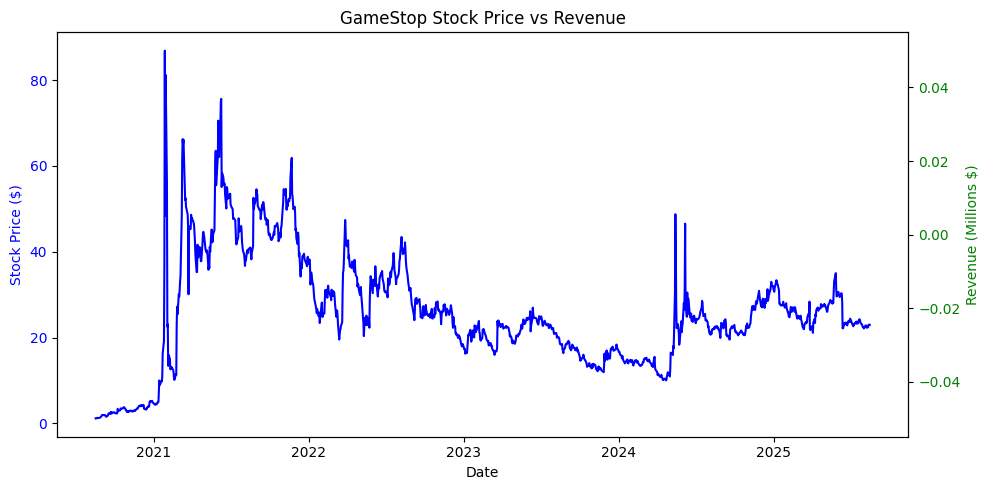

In [ ]:
make_graph(gme_data, gme_revenue, 'GameStop Stock Price vs Revenue')